<a href="https://colab.research.google.com/github/SumayyaShaji/datascience/blob/main/projectnews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('covid.csv',usecols=['Headline','Sentiment','Description'])
df.head()


,Headline,Sentiment,Description
0,"Coronavirus cases reach 2,438 in Rajasthan; 81...",0,Rajasthan on Wednesday reported 74 new coronav...
1,"Coronavirus cases in Delhi surge to 3,439 afte...",0,The total number of coronavirus cases in Delhi...
2,"Anguished, I'll always recall our interactions...",1,"Condoling the demise of actor Rishi Kapoor, PM..."
3,It's a terrible week for Indian cinema: Rahul ...,0,Congress leader Rahul Gandhi condoled Rishi Ka...
4,Delhi Police perform 'parikrama' of AIIMS to t...,1,As a sign of respect for healthcare profession...


In [3]:
df.shape


(4072, 3)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4072 entries, 0 to 4071
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headline     4072 non-null   object
 1   Sentiment    4072 non-null   int64 
 2   Description  4072 non-null   object
dtypes: int64(1), object(2)
memory usage: 95.6+ KB


In [23]:
df.isnull().mean()


Headline       0.0
Sentiment      0.0
Description    0.0
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


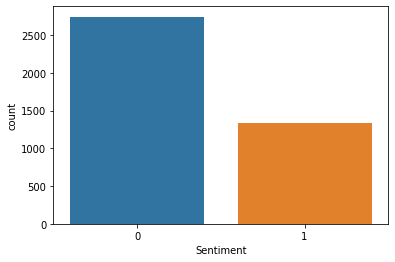

In [24]:
sns.countplot('Sentiment',data=df)


In [5]:
X=df.drop('Sentiment',axis=1)
y=df['Sentiment']

In [6]:
messages=X.copy()


In [9]:
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
ps=PorterStemmer()
corpus=[]
for i in range(len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['Headline'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [11]:
corpus


['coronaviru case reach rajasthan patient recov',
 'coronaviru case delhi surg new case report today',
 'anguish alway recal interact pm modi rishi kapoor death',
 'terribl week indian cinema rahul gandhi rishi kapoor demis',
 'delhi polic perform parikrama aiim thank medic staff',
 'mp govern offic resum work staff',
 'k labour student brought back j k past day amid lockdown',
 'new covid case pune district hour total exce',
 'journalist among new covid case report kerala',
 'maha nashik district report new case includ polic personnel',
 'new case covid karnataka total cross',
 'sanit worker donat month salari telangana cm relief fund',
 'trader delhi azadpur mandi test coronaviru posit',
 'karnataka convert state transport bu mobil fever clinic',
 'us prais india lift export restrict critic medic suppli',
 'test haryana jhajjar district travel delhi',
 'new covid case report rajasthan total case state',
 'new covid case andhra total infect cross',
 'sc refus stay govern central vista

In [12]:
voc_size=5000

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [13]:
onehot_repr=[one_hot(words,voc_size) for words in corpus]
onehot_repr

[[3369, 936, 1900, 1584, 2166, 2267],
 [3369, 936, 4945, 4068, 2630, 936, 3238, 3687],
 [2561, 339, 1532, 4402, 3218, 3558, 3929, 366, 14],
 [4623, 1815, 4835, 1355, 3719, 3798, 3929, 366, 2875],
 [4945, 4539, 3341, 4418, 1414, 3970, 1529, 250],
 [2163, 1924, 162, 2416, 4672, 250],
 [2964, 1913, 2393, 3938, 3918, 1128, 2964, 952, 4983, 1812, 4549],
 [2630, 2671, 936, 2268, 4560, 4446, 51, 1226],
 [2455, 720, 2630, 2671, 936, 3238, 4189],
 [3122, 939, 4560, 3238, 2630, 936, 1858, 4539, 3101],
 [2630, 936, 2671, 1667, 51, 257],
 [1463, 3172, 3384, 1570, 1934, 2255, 3260, 4107, 1555],
 [1969, 4945, 524, 3321, 3215, 3369, 4006],
 [1667, 4546, 2897, 3717, 1629, 2235, 2653, 2736],
 [3922, 3518, 4645, 21, 3197, 4702, 4380, 1529, 1969],
 [3215, 3372, 2398, 4560, 3896, 4945],
 [2630, 2671, 936, 3238, 1584, 51, 936, 2897],
 [2630, 2671, 936, 3831, 51, 1342, 257],
 [3649, 3586, 2789, 1924, 1428, 2000, 1687, 4945],
 [2735, 3128, 1409, 1159, 603, 816, 569, 2493, 2965],
 [4645, 4212, 2467, 4865, 143

In [14]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 1584 2166 2267]
 [   0    0    0 ...  936 3238 3687]
 [   0    0    0 ... 3929  366   14]
 ...
 [   0    0    0 ... 3725 1142 3583]
 [   0    0    0 ...  818 1721 3226]
 [   0    0    0 ... 4703 4177 2731]]


In [15]:
from tensorflow.keras.layers import Dropout
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.5))
model.add(LSTM(200))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [17]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.33,random_state=42)


In [19]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)


Epoch 1/10
43/43 [==============================] - 8s 95ms/step - loss: 0.6453 - accuracy: 0.6642 - val_loss: 0.6078 - val_accuracy: 0.6860
Epoch 2/10
43/43 [==============================] - 2s 53ms/step - loss: 0.5533 - accuracy: 0.7005 - val_loss: 0.4798 - val_accuracy: 0.7812
Epoch 3/10
43/43 [==============================] - 2s 52ms/step - loss: 0.3893 - accuracy: 0.8270 - val_loss: 0.4493 - val_accuracy: 0.7879
Epoch 4/10
43/43 [==============================] - 2s 53ms/step - loss: 0.3152 - accuracy: 0.8578 - val_loss: 0.4477 - val_accuracy: 0.7954
Epoch 5/10
43/43 [==============================] - 2s 53ms/step - loss: 0.2424 - accuracy: 0.9021 - val_loss: 0.4727 - val_accuracy: 0.7872
Epoch 6/10
43/43 [==============================] - 2s 53ms/step - loss: 0.2171 - accuracy: 0.9146 - val_loss: 0.4742 - val_accuracy: 0.7857
Epoch 7/10
43/43 [==============================] - 2s 54ms/step - loss: 0.1791 - accuracy: 0.9326 - val_loss: 0.5323 - val_accuracy: 0.7917
Epoch 8/10
43